# (Communicate data findings (flights data)
## by (Reem Abdulaziz)

## Investigation Overview

> In this investigation, we are going to figure out the interactions of the flight features, And our main focus features of the investigation will be:
ARR_DELAY
Delays reasons
Origin
Day of a week
and DEP_DELAY


## Dataset Overview

>The data is comprised of information about flights, of the year of 2020.Including variables like destinations, arrival and departure delays, day of the week, reason of delays, cancelled flights and more other features.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('Flights.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 31
0,2020,1,1,1,3,2020-01-01,N951WN,ONT,SFO,1810,...,95.0,122.0,74.0,363.0,8.0,0.0,27.0,0.0,33.0,NaN
1,2020,1,1,1,3,2020-01-01,N467WN,ONT,SFO,1150,...,90.0,92.0,71.0,363.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,1,3,2020-01-01,N7885A,ONT,SJC,2020,...,70.0,68.0,57.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,1,3,2020-01-01,N551WN,ONT,SJC,1340,...,75.0,75.0,63.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,1,3,2020-01-01,N968WN,ONT,SJC,915,...,80.0,67.0,57.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN


## ( Flights cancelled per each day of a week)

> There is relationship between cancelled flights and day of weak, the most cancellation flights occuer in weekends.

In [3]:
df_cancelled = df.query('(CANCELLED==1)')
df_notcancelled = df.query('(CANCELLED==0)')

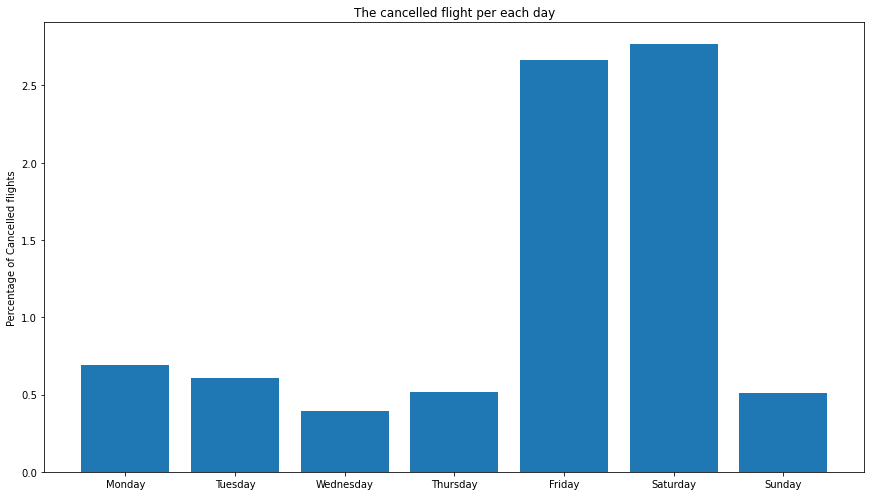

In [4]:
days_cancelled = df_cancelled['CANCELLED'].groupby(df['DAY_OF_WEEK']).count()
days_total = df['CANCELLED'].groupby(df['DAY_OF_WEEK']).count()
days_fraction = np.divide(days_cancelled, days_total)
x_values= days_fraction.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (14.70,8.27));
ax.bar(x_values,days_fraction*100, align='center')
ax.set_ylabel('Percentage of Cancelled flights')
ax.set_xticks(x_values)
ax.set_xticklabels(week)
ax.set_title("The cancelled flight per each day");

## (Delay Causes)

> This pie chart shows the proportion of of delay causes (in minutes) of each cause in the delayed flights dataset. and we can see that tho most frequent delay Causes is carrier delay.

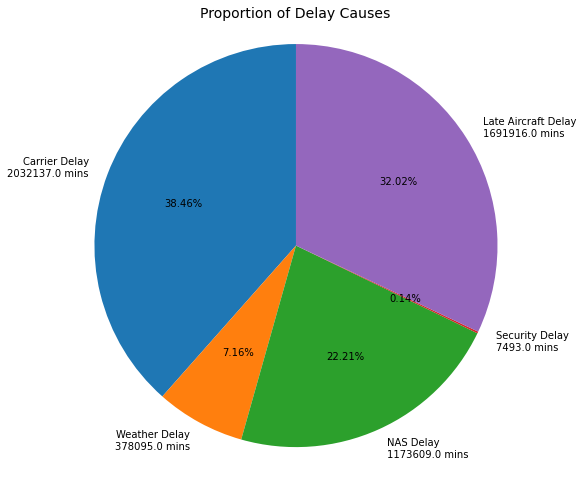

In [5]:
sizes  = [ df.CARRIER_DELAY.sum(), df.WEATHER_DELAY.sum(),df.NAS_DELAY.sum(),
          df.SECURITY_DELAY.sum() ,df.LATE_AIRCRAFT_DELAY.sum()]
labels = [
            'Carrier Delay\n' + str(sizes[0]) + ' mins',\
            'Weather Delay\n' + str(sizes[1]) + ' mins', \
            'NAS Delay\n' + str(sizes[2]) + ' mins',\
            'Security Delay\n' + str(sizes[3]) + ' mins',\
            'Late Aircraft Delay\n' + str(sizes[4]) + ' mins' ]     
plt.figure(figsize=[14.70, 8.27])
plt.pie(sizes, autopct='%.2f%%', startangle=90,labels=labels, explode=None)
plt.axis('square')
plt.title('Proportion of Delay Causes', fontsize=14);

## (Departure delays per each day and if there is a cancellation causes)
>From this plot, we can see that there are many delays without cancellation on the weekends.
also, we can saw from this plot is that the most frequent delay reason is carrier delay besides many of these flights don't cancel.


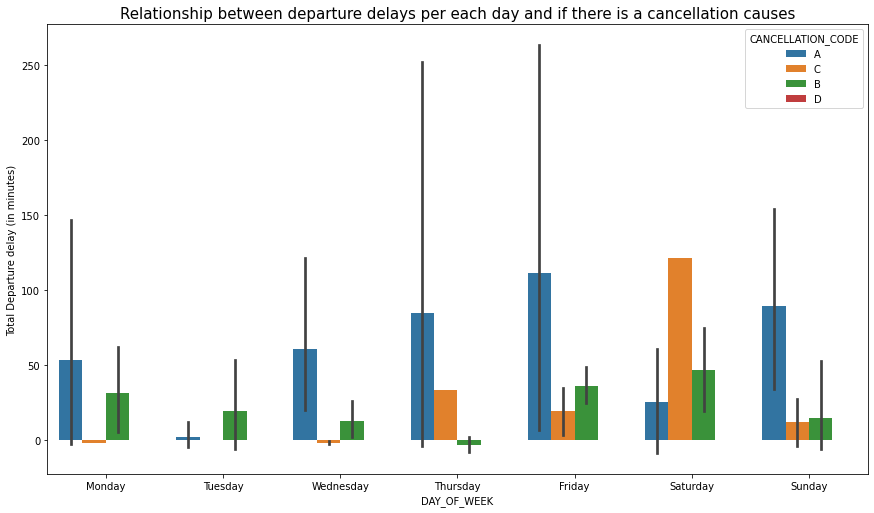

In [6]:
# the cancellation code refrence to these delay reasons(A: Carrier, B: Weather, 
# C: National Air System, D: Security)
plt.figure(figsize=[14.70, 8.27])
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sb.barplot(data = df, x = 'DAY_OF_WEEK', y = 'DEP_DELAY', hue = 'CANCELLATION_CODE');
ax.set_ylabel('Total Departure delay (in minutes)')
ax.set_xticklabels(week)
ax.set_title("Relationship between departure delays per each day and if there is a cancellation causes"
             ,fontsize=15);

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 378536 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
